# Image Denoising
   **A. Read the image of Camerman image at the input and apply Gaussian noises, salt pepper to it. Then apply the mean, midian and Gaussian filters to the corrupted images. The size of the filters should be considered in 3x3 and 5x5 sizes. Repeat the required process for Baboon image. What difference do you see in applying different filters in these two images? Explain the differences in the form of a report.**
   
   **B. Before applying the filters required in the previous section, map the image using a logarithmic function and then filter. After applying the spatial filter using the logarithmic function, reconstruct the image and examine the effect of applying the logarithmic function in reducing noise.**

The following code snippet import required third-party libraries:
+ `cv2` for reading and utilizing image processing functions
+ `numpy` for calculating and considering images as numerical matrixes
+ `matplotlib.pyplot` for showing images in the output
+ `skimage` for changing and applyting filters to images

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import skimage

### Part A
In the following code snippet, we are going to read two benchmark images.

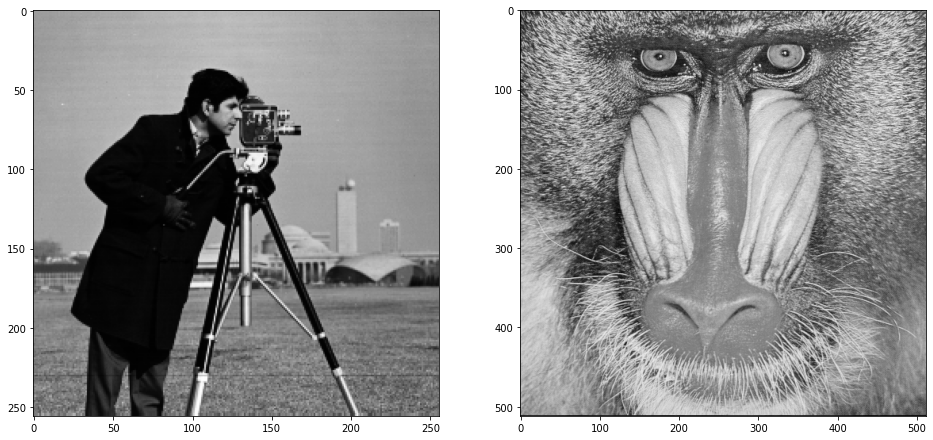

In [2]:
# Reading images in grayscale mode
cameraman = cv2.imread("../../images/cameraman.tif", cv2.IMREAD_GRAYSCALE)
baboon = cv2.imread("../../images/mandril.tiff", cv2.IMREAD_GRAYSCALE)

# Showing the image in subplots
f, subplt = plt.subplots(1, 2, figsize=(16, 14))
subplt[0].imshow(cameraman, cmap="gray")
subplt[1].imshow(baboon, cmap="gray")
plt.show()


In [3]:
from skimage.util import random_noise
from skimage.morphology import disk
from skimage.filters import median
from skimage.filters import gaussian

In [10]:
def noise_test(image):
    """
    image: desire image to add noise and apply mean, median and Gaussian filter to it.
    return None; It will show org image, corrupted image, and results of 6 filters.
    """

    # Adding Gaussian noise
    corrrupted_image = random_noise(image,mode='gaussian',var=0.01,mean=0)
    # Adding salt and pepper noise
    corrrupted_image = random_noise(corrrupted_image, mode='s&p')

    # Applying 3x3 mean filter
    kernel = np.ones((3,3),dtype=np.float32)/49
    mean_3 = cv2.filter2D(corrrupted_image,-1,kernel)
    # Applying 5x5 mean filter
    kernel = np.ones((5,5),dtype=np.float32)/25
    mean_5 = cv2.filter2D(corrrupted_image,-1,kernel)

    # Applying 3x3 median filter
    median_3 = median(corrrupted_image, disk(3))
    # Applying 5x5 median filter
    median_5 = median(corrrupted_image, disk(5))

    # Applying 3x3 Gaussian filter
    gaussian_3 = gaussian(corrrupted_image, sigma=3/6)
    # Applying 5x5 Gaussian filter
    gaussian_5 = gaussian(corrrupted_image, sigma=5/6)
    

    # Showing every result with title and without axis
    f, subplt = plt.subplots(4, 2, figsize=(16,14))

    
    subplt[0][0].imshow(image, cmap = 'gray')
    subplt[0][0].set_title("Original Image")
    subplt[0][0].axis('off')
    
    subplt[0][1].imshow(corrrupted_image, cmap='gray')
    subplt[0][1].set_title("Corrupted Image")
    subplt[0][1].axis('off')
    
    
    subplt[1][0].imshow(mean_3, cmap = 'gray')
    subplt[1][0].set_title("Mean Filter 3x3")
    subplt[1][0].axis('off')
    
    
    subplt[1][1].imshow(mean_5, cmap = 'gray')
    subplt[1][1].set_title("Mean Filter 5x5")
    subplt[1][1].axis('off')
    
    
    subplt[2][0].imshow(median_3, cmap = 'gray')
    subplt[2][0].set_title("Medain Filter 3x3")
    subplt[2][0].axis('off')
    
    
    subplt[2][1].imshow(median_5, cmap = 'gray')
    subplt[2][1].set_title("Median Filter 5x5")
    subplt[2][1].axis('off')
    
    
    subplt[3][0].imshow(gaussian_3, cmap= 'gray')
    subplt[3][0].set_title("Gaussian Filter 3x3")
    subplt[3][0].axis('off')
    
    
    subplt[3][1].imshow(gaussian_5, cmap= 'gray')
    subplt[3][1].set_title("Gaussian Filter 5x5")
    subplt[3][1].axis('off')
    
    
    plt.show()

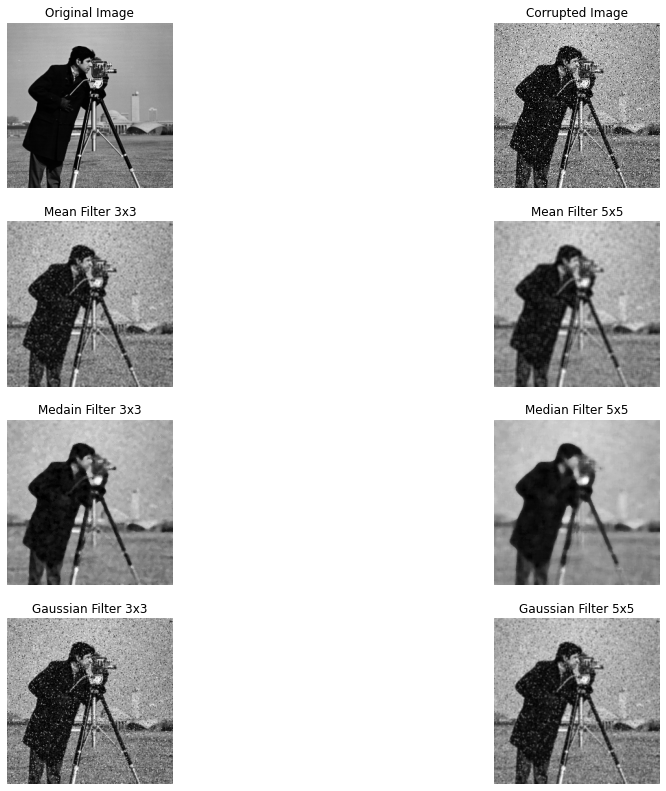

In [11]:
# Testing Camerman image
noise_test(cameraman)

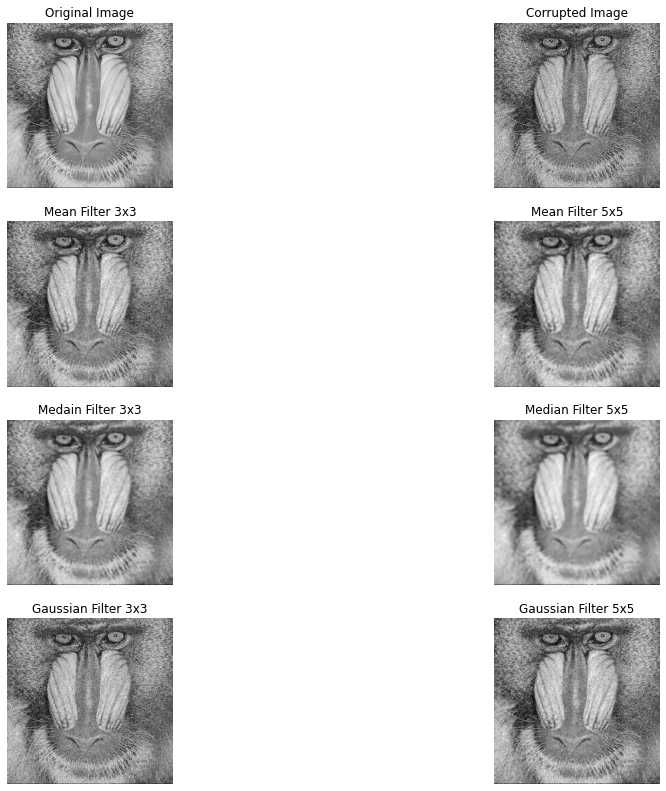

In [12]:
# Testing Baboon image
noise_test(baboon)

### Part B 

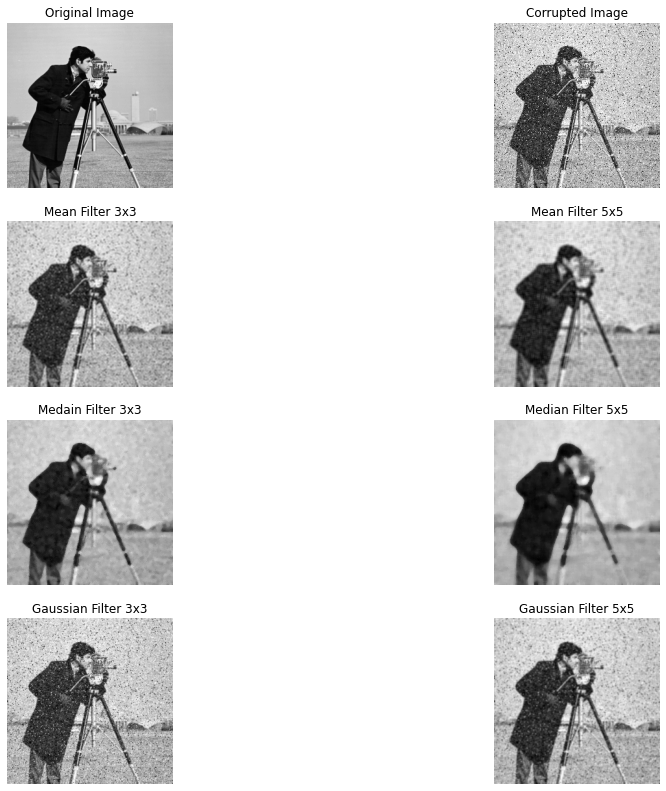

In [7]:
# Applying logarithmic change to the image and testing it
cameraman_log = skimage.exposure.adjust_gamma(cameraman,0.5)
noise_test(cameraman_log)

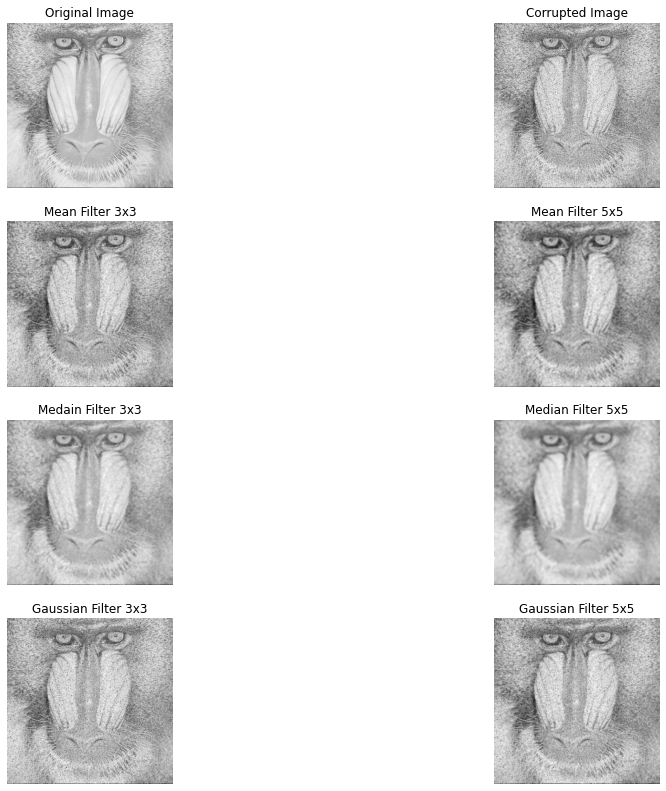

In [8]:
# Applying logarithmic change to the image and testing it
baboon_log = skimage.exposure.adjust_gamma(baboon,0.5)
noise_test(baboon_log)